# This is a two part assignment that involves image processing and search

Part I: detect shapes and find their bounding boxes and centers.

Part II: find a  path from one point to another using A*


# Group Name: Tulumba


# Contributing group members:
- Batuhan Asma
Umut Kurt
Ulaş Yaprak

# General expectations
- If you use other peoples codes you find on the internet, I expect you to provide a reference.  
- Your code should be briefly but clearly commented.  
- Note that in both parts test images are generated based on the library downloaded from the Ineternet. Every time the test images are re-generated, i.e. your solution is executed once again later, test images will change. Hence, make sure that you do NOT do anything that is in particular to the test images you get from those functions. Indeed it is recommended that you do re-generate test images during coming up with a solution to avoid hard-coding and to see alterantive scenarios to make your code robust to anything that these functions can throw at you.  

- At the end you are to submit this notebook: 
```
File->Download->Download .ipynb
```
save it as ```group_name.ipynb``` and submit through ODTU Class. 
One submission per group is expected.

In [2]:
# a lot of imports, in case you need more you are welcome to add here
import numpy as np   # for arrays, math functions, etc
import matplotlib.pyplot as plt # for plotting
from skimage import io  # for reading images
import cv2  # for image processing

# Download the library function to generate images for search

In [2]:
# download library
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/images4.py

]4;0;#191d24\]4;1;#D19275\]4;2;#6C808B\]4;3;#AA9F99\]4;4;#B9BFBE\]4;5;#CFB4A4\]4;6;#D9C6B4\]4;7;#e3deda\]4;8;#9e9b98\]4;9;#D19275\]4;10;#6C808B\]4;11;#AA9F99\]4;12;#B9BFBE\]4;13;#CFB4A4\]4;14;#D9C6B4\]4;15;#e3deda\]10;#e3deda\]11;#191d24\]12;#e3deda\]13;#e3deda\]17;#e3deda\]19;#191d24\]4;232;#191d24\]4;256;#e3deda\]708;#191d24\--2022-01-16 06:54:00--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/images4.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10674 (10K) [text/plain]
Saving to: ‘images4.py.1’

images4.py.1        100%[===================>]  10,42K  --.-KB/s    in 0,002s  

2022-01-16 06:54:01 (4,34 MB/s) - ‘images4.py.1’ saved [10674/10674]



# Part I: Shape detection using techniques introduced in class

In this part you are to detect the location and type of objects in an image.  
This image is automatically (and randomly) generated as shown below. Yet this image generating function also returns the ground truth, so that you can evaluate the performance of you approach.

Start with the image generator import

In [3]:
from images4 import Shapes  # for reading images

## Test image generation
Run the following cell couple of times to see the generation of a new image.
Note that ```gt``` contains the *ground truth* about shapes, where first the rectangle that surrounds the shape (i.e. bounding box) is given using its left top and right bottom corner coordinates. Then the name of the shape is given.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[(((207, 451), (234, 478)), 'ring'),
 (((247, 298), (289, 378)), 'frame'),
 (((105, 258), (134, 287)), 'circle'),
 (((411, 113), (448, 150)), 'ring'),
 (((41, 543), (81, 611)), 'frame'),
 (((299, 58), (399, 105)), 'frame'),
 (((141, 178), (181, 218)), 'square')]

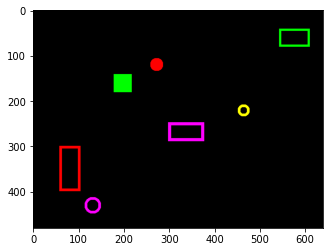

In [4]:
img, gt = Shapes()  # read in the image and ground truth
plt.imshow(img)  # show the image
gt  # show the ground truth

## About the shapes and colors
As shown above when you call the ```Shapes()``` function it returns an image followed by the ground truth about these shapes.  

Note that there are a total of 5 shapes:  
- circle
- ring _(i.e. a circle with a circular hole in it)_
- square
- rectangle
- frame _(i.e. a rectangle with a rectangular hole in it)_

Shapes have a total of 6 different colors. Let's see if you can quickly find what these 6 colors are.  
_Hint: colorz and randomColor(), hmmm but where is that?_  
_Another Hint: recall linux tutorials, ask yourself where Shapes() come from and in a code block try something that starts with !_

In [5]:
# following up on Hints
!

]4;0;#191d24\]4;1;#D19275\]4;2;#6C808B\]4;3;#AA9F99\]4;4;#B9BFBE\]4;5;#CFB4A4\]4;6;#D9C6B4\]4;7;#e3deda\]4;8;#9e9b98\]4;9;#D19275\]4;10;#6C808B\]4;11;#AA9F99\]4;12;#B9BFBE\]4;13;#CFB4A4\]4;14;#D9C6B4\]4;15;#e3deda\]10;#e3deda\]11;#191d24\]12;#e3deda\]13;#e3deda\]17;#e3deda\]19;#191d24\]4;232;#191d24\]4;256;#e3deda\]708;#191d24\

<hr>


## PART I.a - Clean as a whistle :)

First you will work on a clean image, then repeat the same procedure for a noisy one.

### Generate the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[(((107, 434), (142, 500)), 'frame'),
 (((290, 571), (318, 599)), 'circle'),
 (((351, 324), (427, 370)), 'frame'),
 (((186, 43), (237, 74)), 'frame'),
 (((45, 82), (88, 162)), 'frame'),
 (((434, 176), (478, 220)), 'square'),
 (((259, 512), (284, 537)), 'square'),
 (((150, 228), (176, 254)), 'ring')]

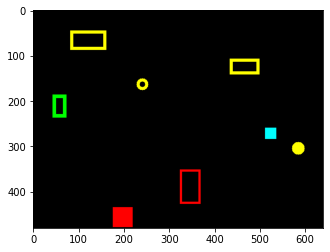

In [6]:
test_image, GTshapes = Shapes()  # read in the image and ground truth
plt.imshow(test_image)  # show the image
GTshapes  # show the ground truth

###Process the image to find regions of interest
Process ```test_image``` to find the list of colored regions.  
Put them in a varialbe named ```found_shapes``` in the same format with ```GTshapes```.  

You can add as many code blocks below as needed.

/home/ulasyaprak/.local/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


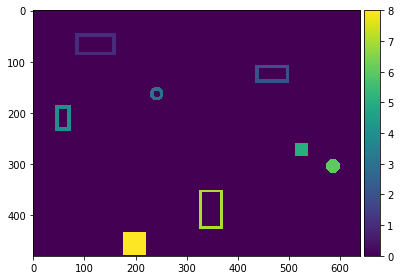

In [7]:
# do your magic here down to the Finally region
import cv2                                                                       #imported for connected component labeling
from math import pi
test_image = test_image.astype('uint8')                                          #data type is transformed to uint8
imgGray = cv2.cvtColor(test_image,cv2.COLOR_RGB2GRAY)                            #grayscale image is produced
imgTresh = cv2.threshold(imgGray,0,255,cv2.THRESH_BINARY)[1]                       #background and foreground object is selected using treshold
num_labels,labels,stat,centroid = cv2.connectedComponentsWithStats(imgTresh)     #connected component labeling done by cv2 library
found_shapes = []                                                                
for i,j,k,l,n in stat:                                                           #connected component labeling stats leftmost, topmost, width , height and area  
  if abs(k-l)<2 and k*l==n:                                                      #checks if shape is a square
    found_shapes.append([(j,i),(j+l,i+k),"square"])                            #square is added to found_shapes list
  elif abs(k-l)<2 and labels[round(j+l/2),round(i+k/2)] != 0:                    #checks if shape is a circle
   found_shapes.append([(j,i),(j+l,i+k),"circle"])                             #circle is added to the list
  elif abs(k-l)<2 and labels[round(j+l/2),round(i+k/2)] == 0:                    #checks if shape is a ring
    found_shapes.append([(j,i),(j+l,i+k),"ring"])                             #ring is a circle with a hole
  else:
    if labels[round(j+l/2),round(i+k/2)] != 0:                               
      found_shapes.append([(j,i),(j+l,i+k),"rectangle"])                         #checks if shape is a rectangle
    else:  
      found_shapes.append([(j,i),(j+l,i+k),"frame"])                             #checks if shape is a frame


found_shapes.remove(found_shapes[0])                                             #remove background stats


###Finally - PART I.a: Performance Report
Now that you, have ```found_shapes``` filled in and it is time to compare it to ```GTshapes```.  
Compare the matching shapes from ```found_shapes``` to the ones in ```GTshapes```. Note that this is __not a manual__ matching process. __Your code should do it__.

Once shapes are mathed, you should compare the center of each shape and label.  
In a loop go over each matching shape pair and print a single line for each comparison where you tell if the shape types match, also report the pixelwise difference between matching objects. In this context center is simply the average of top left and right bottom corner coordinates.

In [8]:
# performance report 
GTshapes = sorted(GTshapes)                                                      #GTshapes is sorted to match with found_shapes
i=0                                                                              #i is set to 0
GTcentroids=[]                                                                   #List of centroid values taken from ground truth 
centroids=[]                                                                     #List of centroid values taken from found_shapes
while i<len(GTshapes):                                                           #while i is less than the length of GTshapes
  tempGTcentroids=[]                                                             #tempGTcentroids is set to empty list
  tempFoundcentroids=[]                                                          #tempFoundcentroids is set to empty list

  tempGTcentroids.append((GTshapes[i][0][0][1]+GTshapes[i][0][1][1])/2)          #centroid in x direction is found by simply averaging
  tempGTcentroids.append((GTshapes[i][0][0][0]+GTshapes[i][0][1][0])/2)          #centroid in y direction is found by simply averaging

  tempFoundcentroids.append((found_shapes[i][0][1]+found_shapes[i][1][1])/2)     #centroid in x direction is found by simply averaging
  tempFoundcentroids.append((found_shapes[i][0][0]+found_shapes[i][1][0])/2)     #centroid in y direction is found by simply averaging
  
  
  centroids.insert(i,tempFoundcentroids)                                         #centroids list is inserted with tempFoundcentroids
  GTcentroids.insert(i,tempGTcentroids)                                          #GTcentroids list is inserted with tempGTcentroids
  if GTshapes[i][1] == found_shapes[i][2]:                                       #if shape names are matching
    x = abs(GTcentroids[i][0]-centroids[i][0])                                   #difference between ground truth and centroid in x direction
    y = abs(GTcentroids[i][1]-centroids[i][1])                                   #difference between ground truth and centroid in y direction
    print(f"{GTshapes[i][1]}s are matched with {x} pixels error in x direction,{y} pixels error in y direction") #print the shape name and difference
  else:                                                                         #if shape names are not matching
    print("Mismatched shapes!")                                                 #print mismatched shapes
  i=i+1



frames are matched with 0.0 pixels error in x direction,0.0 pixels error in y direction
frames are matched with 0.0 pixels error in x direction,0.0 pixels error in y direction
rings are matched with 0.5 pixels error in x direction,0.5 pixels error in y direction
frames are matched with 0.0 pixels error in x direction,0.0 pixels error in y direction
squares are matched with 0.0 pixels error in x direction,0.0 pixels error in y direction
circles are matched with 0.5 pixels error in x direction,0.5 pixels error in y direction
frames are matched with 0.0 pixels error in x direction,0.0 pixels error in y direction
squares are matched with 0.0 pixels error in x direction,0.0 pixels error in y direction


##PART I.b - Dirty case
This is the functionally the same deal as in PART I.a, but this time test image is generated as follows:

### Get the dirty test image

/home/ulasyaprak/Downloads/images4.py:200: UserWarning: test.jpg is a low contrast image
  io.imsave('test.jpg', colorIm, quality = Imquality)
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


[(((317, 357), (343, 403)), 'frame'),
 (((257, 105), (288, 136)), 'ring'),
 (((382, 474), (430, 566)), 'frame'),
 (((135, 428), (167, 460)), 'circle'),
 (((75, 56), (112, 93)), 'square'),
 (((436, 284), (461, 320)), 'frame'),
 (((179, 184), (217, 222)), 'circle'),
 (((33, 606), (63, 636)), 'ring'),
 (((227, 245), (247, 276)), 'frame'),
 (((350, 145), (370, 176)), 'frame')]

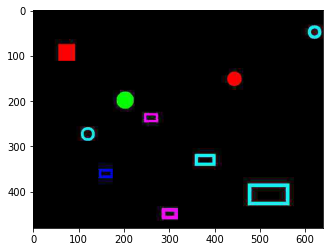

In [9]:
test_imageD, GTshapesD = Shapes(True) # read in the image and ground truth
plt.imshow(test_imageD) # show the image
GTshapesD # show the ground truth

### check out the noisy images
just that you can see them one by one so that you can get a feeling of the level of noise

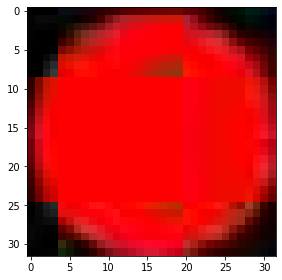

In [10]:
ii = 3 # index of the shape to zoom into, change then index to zoom deeper in to a shape you are interested in
io.imshow(test_imageD[GTshapesD[ii][0][0][0]:GTshapesD[ii][0][1][0], GTshapesD[ii][0][0][1]:GTshapesD[ii][0][1][1],:]) # show the image

###Process the image to find regions of interest
Process ```test_imageD``` to find the list of colored regions.  
Put them in a varialbe named ```found_shapesD``` in the same format with ```GTshapesD```.  

You can add as many code blocks below as needed.

In [11]:
# do your magic here down to the Finally region
import cv2                                                                       #imported for connected component labeling
from math import pi                                                             #imported for pi

test_imageD = test_imageD.astype('uint8')                                       #data type is transformed to uint8
imageR = test_imageD[:,:,0]                                                    #red channel is extracted
imageG = test_imageD[:,:,1]                                                  #green channel is extracted
imageB = test_imageD[:,:,2]                                                 #blue channel is extracted
blurR = cv2.GaussianBlur(imageR,(3,3),0)                                     #red channel is blurred
ret3,th3R = cv2.threshold(blurR,200,255,cv2.THRESH_BINARY)                  #red channel is thresholded
blurB = cv2.GaussianBlur(imageB,(3,3),0)                                    #blue channel is blurred
ret3,th3B = cv2.threshold(blurB,200,255,cv2.THRESH_BINARY)                #blue channel is thresholded
blurG = cv2.GaussianBlur(imageG,(3,3),0)                                   #green channel is blurred
ret3,th3G = cv2.threshold(blurG,200,255,cv2.THRESH_BINARY)              #green channel is thresholded
cImage = np.zeros(imageR.shape)                                         #cImage is set to empty
for i in range(len(cImage)):                                          #for loop is used to iterate through the image
  for j in range(len(cImage[0])):                                  #for loop is used to iterate through the image
    if (th3R[i][j] or th3B[i][j] or th3G[i][j]):                #if any of the channels are not empty
      cImage[i][j]=255                                       #cImage is set to 255

 
kernel = np.ones((6, 6), np.uint8)                        #dilate first then erode
image = cv2.dilate(cImage,kernel, cv2.BORDER_REFLECT) #dilate
image = cv2.erode(image, kernel, cv2.BORDER_REFLECT) #erode
 
kernel = np.ones((2, 2), np.uint8)                        #erode first then dilate
image = cv2.erode(image, kernel, cv2.BORDER_REFLECT)  #erode
image = cv2.dilate(image,kernel, cv2.BORDER_REFLECT) #dilate




                      #background and foreground object is selected using treshold


In [12]:
image = np.uint8(image)
num_labels,labels,stat,centroid = cv2.connectedComponentsWithStats(image)     #connected component labeling done by cv2 library
found_shapesD = []                                                                
for i,j,k,l,n in stat:                                                           #connected component labeling stats leftmost, topmost, width , height and area  
  if abs(k-l)<3 and abs(k*l-n)<51:                                                      #checks if shape is a square
    found_shapesD.append([(j,i),(j+l,i+k),"square"])
  elif abs(k-l)<3 and labels[round(j+l/2),round(i+k/2)] != 0:                    #checks if shape is a circle
   found_shapesD.append([(j,i),(j+l,i+k),"circle"]) 
  elif abs(k-l)<3 and labels[round(j+l/2),round(i+k/2)] == 0:                    #checks if shape is a ring
    found_shapesD.append([(j,i),(j+l,i+k),"ring"])
  else:
    if labels[round(j+l/2),round(i+k/2)] != 0:
      found_shapesD.append([(j,i),(j+l,i+k),"rectangle"])                         #checks if shape is a rectangle
    else:  
      found_shapesD.append([(j,i),(j+l,i+k),"frame"])                             #checks if shape is a frame


found_shapesD.remove(found_shapesD[0])                                             #remove background stats


[[(37, 610), (65, 638), 'ring'],
 [(78, 59), (113, 94), 'square'],
 [(139, 432), (168, 461), 'circle'],
 [(182, 187), (218, 223), 'circle'],
 [(230, 248), (249, 278), 'frame'],
 [(261, 109), (289, 137), 'ring'],
 [(319, 360), (345, 405), 'frame'],
 [(353, 149), (371, 177), 'frame'],
 [(384, 477), (432, 567), 'frame'],
 [(439, 287), (462, 321), 'frame']]

###Finally - PART I.b: Performance Report
Having ```found_shapesD``` filled in now compare it to ```GTshapesD``` as you did above at the end of PART I.a.  


In [13]:
# perofrmance report
GTshapesD = sorted(GTshapesD)                                                      #GTshapes is sorted to match with found_shapes
i=0
GTcentroidsD=[]                                                                   #List of centroid values taken from ground truth 
centroidsD=[]                                                                     #List of centroid values taken from found_shapes
while i<len(GTshapesD):
  tempGTcentroids=[]
  tempFoundcentroids=[]

  tempGTcentroids.append((GTshapesD[i][0][0][1]+GTshapesD[i][0][1][1])/2)          #centroid in x direction is found by simply averaging
  tempGTcentroids.append((GTshapesD[i][0][0][0]+GTshapesD[i][0][1][0])/2)          #centroid in y direction is found by simply averaging

  tempFoundcentroids.append((found_shapesD[i][0][1]+found_shapesD[i][1][1])/2)     #centroid in x direction is found by simply averaging
  tempFoundcentroids.append((found_shapesD[i][0][0]+found_shapesD[i][1][0])/2)     #centroid in y direction is found by simply averaging
  
  
  centroidsD.insert(i,tempFoundcentroids)
  GTcentroidsD.insert(i,tempGTcentroids)
  if GTshapesD[i][1] == found_shapesD[i][2]:                                       #if shape names are matching
    x = abs(GTcentroidsD[i][0]-centroidsD[i][0])                                   #difference between ground truth and centroid in x direction
    y = abs(GTcentroidsD[i][1]-centroidsD[i][1])                                   #difference between ground truth and centroid in y direction
    print(f"{GTshapesD[i][1]}s are matched with {x} pixels error in x direction,{y} pixels error in y direction")
  else:
    print("Mismatched shapes!")
  i=i+1

rings are matched with 3.0 pixels error in x direction,3.0 pixels error in y direction
squares are matched with 2.0 pixels error in x direction,2.0 pixels error in y direction
circles are matched with 2.5 pixels error in x direction,2.5 pixels error in y direction
circles are matched with 2.0 pixels error in x direction,2.0 pixels error in y direction
frames are matched with 2.5 pixels error in x direction,2.5 pixels error in y direction
rings are matched with 2.5 pixels error in x direction,2.5 pixels error in y direction
frames are matched with 2.5 pixels error in x direction,2.0 pixels error in y direction
frames are matched with 2.5 pixels error in x direction,2.0 pixels error in y direction
frames are matched with 2.0 pixels error in x direction,2.0 pixels error in y direction
frames are matched with 2.0 pixels error in x direction,2.0 pixels error in y direction


# Part II: Search from beginning to end
In this part your code will try to find the shortest path between two points.


## Conventions
Your serach always starts from the center of the RED box and ends at the center of the GREEN one.  

BLACK is always a wall that your path CANNOT pass through. Hence, you can assume that a black pixel has infinite cost, whatever that means.  

Color values for default colors are as follows:
BLACK = (0,0,0)
RED = (255,0,0)
GREEN = (0,255,0)

Cost of all RED and GREEN pixels are all 1.  

For all other colors in the search image you will be given a dictionary that contains color values and cost of traversing a pixel with that color.  

You can only move to 4-neighbors of a pixel.  

Once you find the path, mark it pixel by pixel on the map with a distinct color and display it at the end.

Let's import the weird maze generator.

In [14]:
from images4 import aMaze

## Get a test image


array([[255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,   0,   1],
       [255,  13,   9],
       [255,  62,  58],
       [255, 194, 195],
       [255, 250, 250],
       [255, 254, 255],
       [255, 254, 255],
       [255, 254, 255],
       [255, 254, 255]], dtype=uint8)

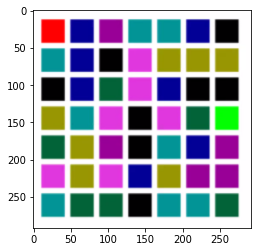

In [12]:
mazeImg = cv2.imread("ss.png")
mazeImg = cv2.cvtColor(mazeImg, cv2.COLOR_BGR2RGB)
plt.imshow(mazeImg)
mazeImg[20:50,25]

## Find a solution
Find a solution from the center of the starting block (i.e. RED block) to the center of target block (i.e. GREEN block) using A*.  
You do NOT need to write A* from scratch (but you can), an existing impementation can be adopted to this problem.  
You are expected to provide references to your imports regarding A*.




In [16]:
!pip install pathfinder

]4;0;#191d24\]4;1;#D19275\]4;2;#6C808B\]4;3;#AA9F99\]4;4;#B9BFBE\]4;5;#CFB4A4\]4;6;#D9C6B4\]4;7;#e3deda\]4;8;#9e9b98\]4;9;#D19275\]4;10;#6C808B\]4;11;#AA9F99\]4;12;#B9BFBE\]4;13;#CFB4A4\]4;14;#D9C6B4\]4;15;#e3deda\]10;#e3deda\]11;#191d24\]12;#e3deda\]13;#e3deda\]17;#e3deda\]19;#191d24\]4;232;#191d24\]4;256;#e3deda\]708;#191d24\Defaulting to user installation because normal site-packages is not writeable


### Imports

In [17]:
# import any additional library realted to this part and provide references
import numpy as np  
from numpy.linalg import matrix_rank as rank
import matplotlib.pyplot as plt
from math import *
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder
from pathfinding.core.diagonal_movement import DiagonalMovement

### Implement your solution
All your code generated to find a solution should be given below.
I would like to see your heuristic function separately though.  
You can add as many code blocks as you like. But make sure that the first block is your heuristic.  


In [18]:
color_costs = list(color_costs.values()) # convert the color costs to a list
color_costs_user=np.zeros((7,3),dtype=int) # create a matrix of zeros
color_costs_user_2=np.zeros((7,1),dtype=int) # create a matrix of zeros
# flatten color_costs to a 2D array 
for i in range (len(color_costs)): # for each color cost
    color_costs_user_2[i]=color_costs[i][1] # get the second element of the list
    color_costs_user[i] = list(color_costs[i][0]) # get the first element of the list
color_costs = np.concatenate((color_costs_user, color_costs_user_2), axis=1) # concatenate the two matrices
color_costs 

array([[255, 255, 255,   2],
       [  0,   0, 150,   8],
       [150, 150,   0,  14],
       [150,   0, 150,   4],
       [  0, 150, 150,  12],
       [222,  55, 222,  10],
       [  0,  99,  55,   6]])

In [19]:
# heuristic function is to be implemented here
def heuristic(x1,x2,y1,y2):
    '''
    this function is used to calculate the heuristic value for the A* algorithm as manhattan distance
    the solutution is called from the AStarFinder class in the pathfinding library which uses its own heuristic function
    the heuristic function in the library also uses the manhattan distance when DiagonalMovement is set to DiagonalMovement.never 
    which is the default value and used here.
    the instructor (Buğra Hoca) is contacted to explain the heuristic function usage problem.
    '''
    return abs(x1-x2)+abs(y1-y2)  # manhattan distance


In [20]:
# cost function to be used in uniform cost will be here
def cost(mazeImg,color_costs): 
    '''
    this function creates an array with the cost of each pixel in mazeImg
    '''
    cost_array=np.zeros((mazeImg.shape[0],mazeImg.shape[1])) # create an array of zeros with the same size as mazeImg
    for i in range(len(mazeImg)): # loop through the rows
        for j in range(len(mazeImg[0])): # loop through the columns
            for k in range(len(color_costs)): # loop through the color costs
                if (mazeImg[i][j][0] == color_costs[k][0] and mazeImg[i][j][1] == color_costs[k][1] and mazeImg[i][j][2] == color_costs[k][2]): # if the pixel is the same as the color cost
                    cost_array[i][j]=color_costs[k][3] # set the cost of the pixel to the cost of the color cost
            if (mazeImg[i][j][0] == 0 and mazeImg[i][j][1] == 255 and mazeImg[i][j][2] == 0): # if the pixel is green
                cost_array[i][j]=1 # set the cost of the pixel to 1
            elif (mazeImg[i][j][0] == 255 and mazeImg[i][j][1] == 0 and mazeImg[i][j][2] == 0): # if the pixel is red
                cost_array[i][j]=1 # set the cost of the pixel to 1
            elif (mazeImg[i][j][0] == 0 and mazeImg[i][j][1] == 0 and mazeImg[i][j][2] == 0): # if the pixel is black
                cost_array[i][j]=0 # set the cost of the pixel to -1
    return cost_array # return the cost array
    


In [21]:
def find_start_and_finish(mazeImg):
    '''
    this funtion finds the centers of green and red boxes in mazeImg
    '''
    # find the centers of the boxes
    reds=[] # list of red boxes
    greens=[] # list of green boxes
    gx=0 # x coordinate of green box
    gy=0 # y coordinate of green box
    rx=0 # x coordinate of red box
    ry=0 # y coordinate of red box
    for i in range(len(mazeImg)): # loop through the rows
        for j in range(len(mazeImg[0])): # loop through the columns
            if (mazeImg[i][j][0] == 0 and mazeImg[i][j][1] == 255 and mazeImg[i][j][2] == 0): # if the pixel is green
               greens.append([i,j]) # append the coordinates of the green box to the list
            elif (mazeImg[i][j][0] == 255 and mazeImg[i][j][1] == 0 and mazeImg[i][j][2] == 0): # if the pixel is red
               reds.append([i,j]) # append the coordinates of the red box to the list

    for i,j in greens:  # average of green coordinates
        gx+=i # sum of green coordinates
        gy+=j # sum of green coordinates
    gx=gx/len(greens) # average of green coordinates
    gy=gy/len(greens) # average of green coordinates

    for i,j in reds:  # average of red coordinates
        rx+=i # sum of red coordinates
        ry+=j # sum of red coordinates
    rx=rx/len(reds) # average of red coordinates
    ry=ry/len(reds) # average of red coordinates
    return rx,ry,gx,gy # return the coordinates of the centers of the red and green boxes

In [22]:
# do your magic for everything else here and below.
Grid.cleanup  # clean up the grid class in the pathfinding library

<function pathfinding.core.grid.Grid.cleanup(self)>

In [23]:
rx,ry,gx,gy=find_start_and_finish(mazeImg) # find the centers of the red and green boxes
img=cost(mazeImg,color_costs) # get the cost array
grid = Grid(matrix=img) # create a grid object with the cost array
start = grid.node(int(rx), int(ry)) # create a start node with the coordinates of the red box center
end = grid.node(int(gx), int(gy)) # create an end node with the coordinates of the green box center
finder = AStarFinder(diagonal_movement=DiagonalMovement.never, time_limit=inf,max_runs=inf) # create an A* finder object with DiagonalMovement.never as its value for diagonal movement 
path, runs = finder.find_path(start, end, grid) # find the path between the start and end nodes with the grid object and return the path and the number of runs of the algorithm 

##Finally - PART II
Display the final solution here.  
Solution path is expected to be overlayed on top of ```mazeImg``` with a distinctive color and displayed below.
Note that if the Test image changes above, this part should work without a problem!

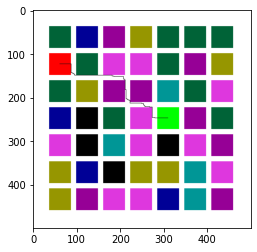

In [24]:
# display solution
road=[] # list of coordinates of the path
for i in range(len(path)): # loop through the path
    road.append(list(path[i])) # append the coordinates of the path to the list
for i,j in road: # loop through the coordinates of the path
    mazeImg[i][j]=[15,15,15] # set the pixel to gray
plt.imshow(mazeImg) # show the maze image with the path 